In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.image as mpimg 


In [3]:
data = pd.read_csv('data/The_Actual_Final_Dataset2.csv')
data.fillna('No')
data.head()
data= data[data['Inflation_Adj_Cost1'] != 0]


In [4]:
data.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'living_area', 'total_value',
       'half_baths', 'construction_quality', 'condition_score', 'garage_type',
       'finished_basement_No', 'total_land', 'zipcodes', 'house_age',
       'Inflation_Adj_Cost1', 'Inflation_Adj_Cost2'],
      dtype='object')

In [5]:
#data2 = pd.get_dummies(data)
#data2.head()
#data2['Inflation_Adj_Cost1']= data2['Inflation_Adj_Cost1'].astype('int')
#data2['Inflation_Adj_Cost2']= data2['Inflation_Adj_Cost2'].astype('int')


#data2

In [6]:
#Took about total value because that's the whole point of the project

X = data[['bedrooms', 'bathrooms', 'half_baths',
          'living_area', 'construction_quality',
       'condition_score', 'garage_type', 'finished_basement_No', 'total_land', 'house_age']]
y = data['Inflation_Adj_Cost1'].values.reshape(-1, 1)
print(X.shape, y.shape)

(7988, 10) (7988, 1)


In [28]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43)
### END SOLUTION
print(X_train)

       bedrooms  bathrooms  half_baths  living_area  construction_quality  \
6781          2          1           0         1054                     5   
8895          4          2           1         2066                     6   
6991          4          2           1         2844                     7   
1336          4          2           1         1524                     6   
10802         3          2           1         1683                     6   
1546          3          3           1         2997                     8   
11125         4          1           1         2764                     6   
5476          2          1           0         1001                     4   
1765          3          1           0         2062                     5   
649           3          1           0         1282                     5   
12230         3          1           1         2192                     6   
10875         4          2           1         2787                     5   

In [29]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION'

In [30]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION
print(X_train_scaled)

[[-1.69890686 -0.74858215 -1.02064026 ... -1.48277168  1.98187868
   0.73215829]
 [ 1.03568503  0.76602631  0.77514705 ... -1.48277168  0.10219825
  -0.08883897]
 [ 1.03568503  0.76602631  0.77514705 ... -1.48277168  0.21903482
  -1.36594582]
 ...
 [-0.33161092  0.76602631 -1.02064026 ...  0.67441267 -0.46326578
   0.32165966]
 [-0.33161092 -0.74858215  0.77514705 ...  0.67441267 -0.14192622
  -0.81861431]
 [ 1.03568503  0.76602631  0.77514705 ... -1.48277168  0.41402241
  -1.54838965]]


In [31]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

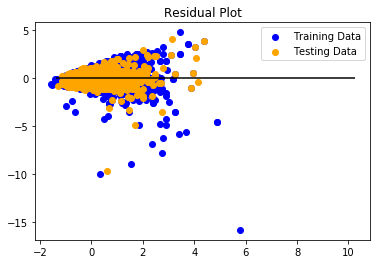

In [32]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [33]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33310814579811243, R2: 0.5851539752631456


In [34]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3308734145773357, R2: 0.5879370635033726


In [35]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33310791427513414, R2: 0.5851542635970948


In [36]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33093753809850684, R2: 0.5878572053906679


In [37]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.33093753809850684, R2: 0.5878572053906679


In [38]:
data.columns

Index(['parcel', 'bedrooms', 'bathrooms', 'living_area', 'total_value',
       'half_baths', 'construction_quality', 'condition_score', 'garage_type',
       'finished_basement_No', 'total_land', 'zipcodes', 'house_age',
       'Inflation_Adj_Cost1', 'Inflation_Adj_Cost2'],
      dtype='object')

In [39]:
# 1. bedrooms
# 2. bathrooms
# 3. half_baths
# 4. Living Area
# 5. construction_quality
# 6. condition_score
# 7. garage_type
# 8. finished_basement_No 
# 9. total_land
# 10. house_age

In [41]:
Sample = np.array([[3,1,1,1932,5,6,2,2,10800,71]])
SS = X_scaler.transform(Sample)
SS
Outcome = y_scaler.inverse_transform(elasticnet.predict(SS))

Outcome

array([211096.29766632])

## 